## COVID-19

Our world in data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

##### Gather data from  https://ourworldindata.org/coronavirus-source-data

In [2]:
df_world = pd.read_csv('https://covid.ourworldindata.org/data/full_data.csv', parse_dates=['date']).set_index(['location','date']).sort_index()
last_date = df_world.reset_index().date.max()
df_world

new_cases  new_deaths  total_cases  total_deaths
location    date                                                        
Afghanistan 2020-02-25        NaN         NaN            1           NaN
            2020-02-26        0.0         NaN            1           NaN
            2020-02-27        0.0         NaN            1           NaN
            2020-02-28        0.0         NaN            1           NaN
            2020-02-29        0.0         NaN            1           NaN
...                           ...         ...          ...           ...
World       2020-03-13     7488.0       338.0       132758        4956.0
            2020-03-14     9761.0       433.0       142534        5392.0
            2020-03-15    10967.0       343.0       153517        5735.0
            2020-03-16    13971.0       855.0       167506        6606.0
            2020-03-17    11594.0       819.0       179112        7426.0

[2867 rows x 4 columns]

add column with double_cases_days with formula:  
$$
\text{doubling rate  in days} = \frac{\log{2}}{\log\frac{\text{total_cases}}{\text{total_cases}-\text{new_cases}}}
$$


In [3]:
df_world['doubling_rate_days'] = np.log(2)/np.log(df_world.total_cases/(df_world.total_cases-df_world.new_cases))
df_world

new_cases  new_deaths  total_cases  total_deaths  \
location    date                                                           
Afghanistan 2020-02-25        NaN         NaN            1           NaN   
            2020-02-26        0.0         NaN            1           NaN   
            2020-02-27        0.0         NaN            1           NaN   
            2020-02-28        0.0         NaN            1           NaN   
            2020-02-29        0.0         NaN            1           NaN   
...                           ...         ...          ...           ...   
World       2020-03-13     7488.0       338.0       132758        4956.0   
            2020-03-14     9761.0       433.0       142534        5392.0   
            2020-03-15    10967.0       343.0       153517        5735.0   
            2020-03-16    13971.0       855.0       167506        6606.0   
            2020-03-17    11594.0       819.0       179112        7426.0   

                        doubling_rate_days  
location    date                            
Afghanistan 2020-02-25                 NaN  
            2020-02-26                 inf  
            2020-02-27                 inf  
            2020-02-28                 inf  
            2020-02-29                 inf  
...                                    ...  
World       2020-03-13           11.939180  
            2020-03-14            9.770940  
            2020-03-15            9.351879  
            2020-03-16            7.958919  
            2020-03-17           10.357770  

[2867 rows x 5 columns]

add column days with number of days since more than `thresh` cases per country:

In [4]:
thresh = 100
df_world['days'] = df_world.groupby(level=[0,1]).filter(lambda x: x['total_cases']>thresh).groupby(level=0).cumcount() + 1
df_world.loc['Germany']

,new_cases,new_deaths,total_cases,total_deaths,doubling_rate_days,days
date,,,,,,
2020-01-28,NaN,NaN,1,NaN,NaN,NaN
2020-01-29,3.0,NaN,4,NaN,0.500000,NaN
2020-01-30,0.0,NaN,4,NaN,inf,NaN
2020-01-31,1.0,NaN,5,NaN,3.106284,NaN
2020-02-01,2.0,NaN,7,NaN,2.060043,NaN
2020-02-02,1.0,NaN,8,NaN,5.190893,NaN
2020-02-03,2.0,NaN,10,NaN,3.106284,NaN
2020-02-04,2.0,NaN,12,NaN,3.801784,NaN
2020-02-05,0.0,NaN,12,NaN,inf,NaN


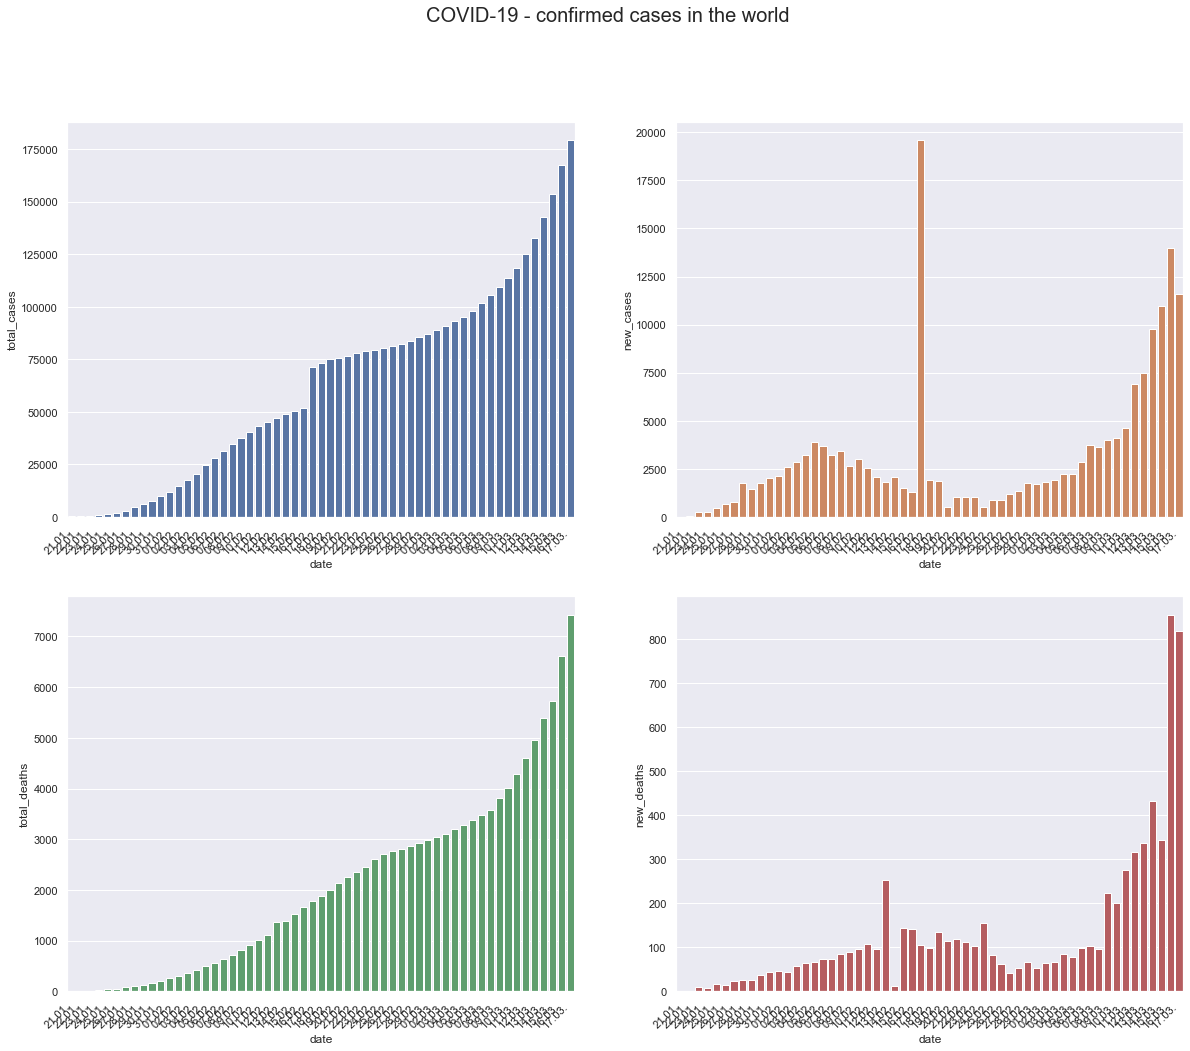

In [5]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
df_plot_data = df_world.loc['World']
for i, ctype in enumerate(['total_cases', 'new_cases', 'total_deaths', 'new_deaths'], 1):
    plt.subplot(2,2,i)
    ax = sns.barplot(data=df_plot_data, x=df_plot_data.index, y=ctype, color=str('C' + str(i-1)))
    xticks = [xdate.strftime('%d.%m.') for xdate in df_plot_data.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')
_ = plt.suptitle('COVID-19 - confirmed cases in the world',fontsize=20)


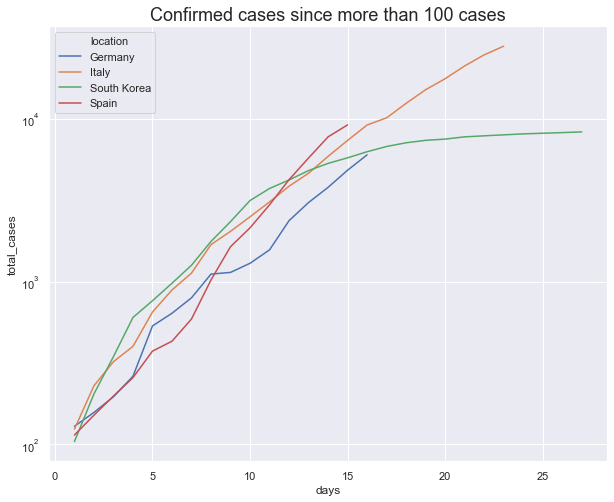

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
df_plot_data = df_world.loc[['Italy', 'Germany', 'Spain','South Korea']].dropna(subset=['days'])
df_plot_data = df_plot_data.reset_index()
ax = sns.lineplot(data=df_plot_data, x='days', y='total_cases', hue='location')
ax.set_yscale('log')
_ = ax.set_title("Confirmed cases since more than {} cases".format(thresh),fontsize=18)

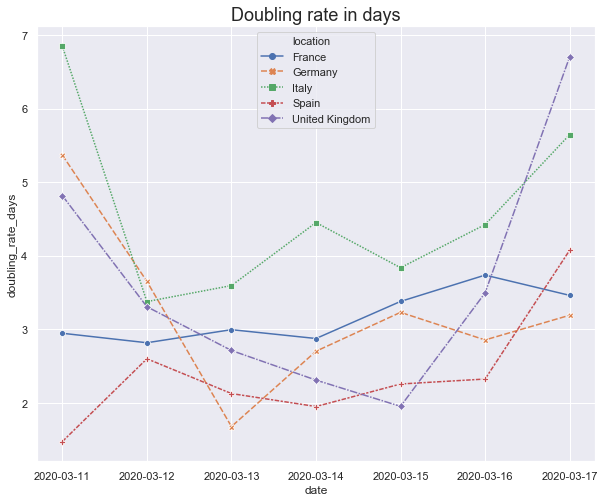

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
df_plot_data = df_world.loc[pd.IndexSlice[['Italy','Germany','Spain', 'France','United Kingdom'],'2020/03/11':],:]
df_plot_data = df_plot_data.reset_index()
sns.lineplot(data=df_plot_data, x='date', y='doubling_rate_days', hue='location', style='location', markers=True)
_ = ax.set_title("Doubling rate in days".format(thresh),fontsize=18)

In [8]:
df_p = df_world.loc[pd.IndexSlice[:,last_date],:].nlargest(10, 'total_cases')
df_p

,,new_cases,new_deaths,total_cases,total_deaths,doubling_rate_days,days
location,date,,,,,,
World,2020-03-17,11594.0,819.0,179112,7426.0,10.357770,57.0
China,2020-03-17,39.0,13.0,81116,3231.0,1441.328442,57.0
Italy,2020-03-17,3233.0,694.0,27980,2503.0,5.645178,23.0
Iran,2020-03-17,0.0,0.0,14991,853.0,inf,20.0
Spain,2020-03-17,1438.0,21.0,9191,309.0,4.073864,15.0
South Korea,2020-03-17,84.0,6.0,8320,81.0,68.307418,27.0
France,2020-03-17,1193.0,21.0,6573,148.0,3.460857,15.0
Germany,2020-03-17,1174.0,1.0,6012,13.0,3.190462,16.0
United States,2020-03-17,1825.0,17.0,3503,58.0,0.941754,14.0


In [9]:
df_p['rate'] = np.log(2)/np.log(df_p.total_cases/(df_p.total_cases-df_p.new_cases))
df_p

,,new_cases,new_deaths,total_cases,total_deaths,doubling_rate_days,days,rate
location,date,,,,,,,
World,2020-03-17,11594.0,819.0,179112,7426.0,10.357770,57.0,10.357770
China,2020-03-17,39.0,13.0,81116,3231.0,1441.328442,57.0,1441.328442
Italy,2020-03-17,3233.0,694.0,27980,2503.0,5.645178,23.0,5.645178
Iran,2020-03-17,0.0,0.0,14991,853.0,inf,20.0,inf
Spain,2020-03-17,1438.0,21.0,9191,309.0,4.073864,15.0,4.073864
South Korea,2020-03-17,84.0,6.0,8320,81.0,68.307418,27.0,68.307418
France,2020-03-17,1193.0,21.0,6573,148.0,3.460857,15.0,3.460857
Germany,2020-03-17,1174.0,1.0,6012,13.0,3.190462,16.0,3.190462
United States,2020-03-17,1825.0,17.0,3503,58.0,0.941754,14.0,0.941754
